In [79]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# Load the dataset
url = "Amazon_reviews_plus_LLM.csv"
data = pd.read_csv(url)
data.head()

review_df = data.drop(["reviewerID","asin","unixReviewTime","reviewTime"],axis=1)
review_df



,reviewerName,helpful,reviewText,overall,summary,llm
0,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,False
1,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,False
2,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,False
3,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,False
4,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,False
...,...,...,...,...,...,...
204050,Rachel L,"[0, 0]",This night cream has made a huge difference in...,5.0,Highly recommend,True
204051,Gavin,"[0, 0]",I've been using this night cream for a few mon...,4.0,Good product,True
204052,Lucy M,"[0, 0]",I'm very impressed with this night cream. It's...,5.0,Perfect for sensitive skin,True
204053,John P,"[0, 0]","I was skeptical about this night cream, but it...",4.0,Surprisingly nice,True


In [80]:
review_df.isna().sum()

ratio = []
#for i in review_df["helpful"]:
  # unhelpful = int(i[1])-int(i[1])
    #ratio[j] = i[0]/unhelpful
#for i in list(review_df.["helpful"]):

arr = review_df.loc[20:20, "helpful"]
arr

20    [0, 0]
Name: helpful, dtype: object

In [81]:
Hrates_df = review_df[review_df["llm"]==False]

Mrates_df = review_df[review_df["llm"]==True]


# Hrates_df.loc[0] = [0]
# j=0
# for llm, rate in zip(review_df["llm"], review_df["overall"]):
#      if(llm == False):
#          Hrates_df["Overall"]
#Method 2
# Hrates_df = pd.DataFrame(columns=["0.0","1.0", "2.0", "2.5", "3.0","4.0","4.5","4.7","4.9","5.0"])
# Hrates_df.loc[0] = [0,0,0,0,0,0,0,0,0,0]


# for llm, rate in zip(review_df["llm"], review_df["overall"]):
#     if(llm == False):
#         Hrates_df[str(rate)].iloc[0] += 1
        

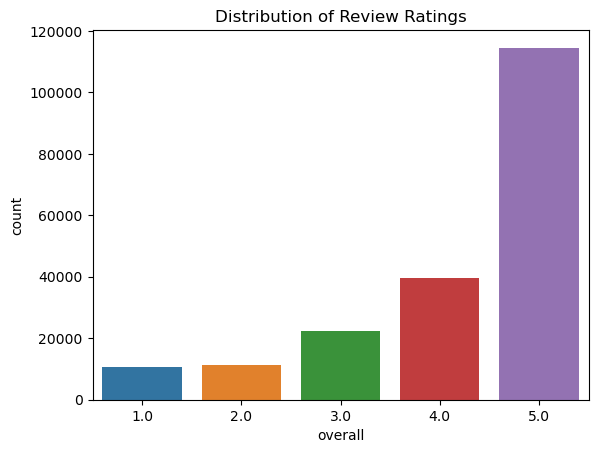

                                  reviewerID  \
198886  621b15f0-412e-47f3-a88d-b0c82b8e4867   

                                        asin reviewerName helpful  \
198886  a5de34ea-9bde-4b2f-8fdc-bcb2244e3da8      John L.  [0, 0]   

                                               reviewText  overall  \
198886  This product is great. It takes off all my mak...      4.7   

                              summary  unixReviewTime  reviewTime   llm  
198886  Leaves skin feeling refreshed      1362268800  03 3, 2013  True  


count    198502.000000
mean          4.190391
std           1.166580
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [82]:
sns.countplot(x="overall", data=Hrates_df)
plt.title("Distribution of Review Ratings")
plt.show()
print(data[data.overall == 4.7])

Hrates_df["overall"].describe()


In [83]:
votes = review_df["helpful"]
votes = [i[1:-1] for i in votes]
helpful = [int(i[0:i.find(',')]) for i in votes]
total_votes = [int(i[i.find(',')+2:]) for i in votes]
ratio_votes = [0]*len(total_votes)
index =0
for i , j in zip(helpful, total_votes):
    if j != 0:
        ratio_votes[index] = i/j
    index +=1
ratio_votes[0]



0.75

In [84]:
temp_df = pd.DataFrame(ratio_votes, columns= ["Helpful_ratio"])

review_df=pd.concat([temp_df, review_df], axis=1)
review_df.head()

,Helpful_ratio,reviewerName,helpful,reviewText,overall,summary,llm
0,0.75,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,False
1,1.00,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,False
2,0.00,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,False
3,1.00,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,False
4,0.00,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,False


In [85]:
# Import required libraries
from transformers import pipeline

# Load sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [95]:
df = review_df    
df.loc[df['reviewText'].str.len() > 200, 'reviewText'] = df.loc[df['reviewText'].str.len() > 200, 'reviewText'].apply(lambda x: ' '.join(x.split()[:256]))

df



,Helpful_ratio,reviewerName,helpful,reviewText,overall,summary,llm
0,0.75,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,False
1,1.00,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,False
2,0.00,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,False
3,1.00,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,False
4,0.00,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,False
...,...,...,...,...,...,...,...
204050,0.00,Rachel L,"[0, 0]",This night cream has made a huge difference in...,5.0,Highly recommend,True
204051,0.00,Gavin,"[0, 0]",I've been using this night cream for a few mon...,4.0,Good product,True
204052,0.00,Lucy M,"[0, 0]",I'm very impressed with this night cream. It's...,5.0,Perfect for sensitive skin,True
204053,0.00,John P,"[0, 0]","I was skeptical about this night cream, but it...",4.0,Surprisingly nice,True


In [103]:
df = df[df['reviewText'].apply(lambda x: isinstance(x, str))]
df = df[df['summary'].apply(lambda x: isinstance(x, str))]
df

,Helpful_ratio,reviewerName,helpful,reviewText,overall,summary,llm
0,0.75,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,False
1,1.00,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,False
2,0.00,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,False
3,1.00,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,False
4,0.00,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,False
...,...,...,...,...,...,...,...
204050,0.00,Rachel L,"[0, 0]",This night cream has made a huge difference in...,5.0,Highly recommend,True
204051,0.00,Gavin,"[0, 0]",I've been using this night cream for a few mon...,4.0,Good product,True
204052,0.00,Lucy M,"[0, 0]",I'm very impressed with this night cream. It's...,5.0,Perfect for sensitive skin,True
204053,0.00,John P,"[0, 0]","I was skeptical about this night cream, but it...",4.0,Surprisingly nice,True


In [104]:
def analyze_sentiment(review):
    result = sentiment_model(review)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to a few example reviews
# Review_sentiments = [analyze_sentiment(review) for review in df["reviewText"]]
# summary_sentiments = [analyze_sentiment(review) for review in df["summary"]]
# Review_sentiments

df['review_sentiment_label'], df['review_sentiment_score'] = zip(*df['reviewText'].apply(analyze_sentiment))

# apply sentiment analysis to the summary column
df['summary_sentiment_label'], df['summary_sentiment_score'] = zip(*df['summary'].apply(analyze_sentiment))

df


In [ ]:
# revText = [0]*len(Review_sentiments)
# sumText = [0]*len(summary_sentiments)

# Rev_df= pd.DataFrame({'revText': Review_sentiments})
# Sum_df = pd.DataFrame({'sumText': summary_sentiments})

# add two new columns
# df[['IsPosReview', 'HowPosRev']] = Rev_df['revText'].apply(pd.Series)
# df[['IsPosSum', 'HowPosSum']] = Sum_df['sumText'].apply(pd.Series)

In [ ]:
df.loc[df['review_sentiment_label'] == 'NEGATIVE', 'review_sentiment_score'] = -df['review_sentiment_score']
df.loc[df['summary_sentiment_label'] == 'NEGATIVE', 'summary_sentiment_score'] = -df['summary_sentiment_score']
df = df.drop(["reviewerName","helpful","reviewText", "summary","review_sentiment_label","summary_sentiment_label"], axis =1)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

X = df.drop('llm', axis=1)
y = df['llm']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the model
model = XGBClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500]
}

# Define the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters found by the grid search object
print(grid_search.best_params_)

# Use the best hyperparameters to fit the model to the training data
model = XGBClassifier(**grid_search.best_params_)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set and print accuracy score
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))